In [8]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.7 MB/s eta 0:00:00


In [9]:
import pandas as pd
import spacy
import textstat
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [5]:
# Load the CSV file
file_path = '/content/ablation_model_comparison.csv'
data = pd.read_csv(file_path)
data.head()

,GPT-4o,Llama-2,Claude-3.5
0,A coral-hued bicycle rests half-buried in gold...,Vibrant flamingo stands on a sunset beach with...,A rusty orange bicycle leaning against a moss-...
1,A patchwork kite flutters gently across an amb...,Majestic mountain range stretches across a vas...,Three sleepy capybaras lounging in a steamy ho...
2,A polished brass coffee mug sits forgotten on ...,Delicate fairy wings flutter in mid-air surrou...,A transparent jellyfish floating through neon-...
3,A sapphire-hued bird with crystalline wings ho...,Radiant rainbow arches over a serene lake with...,Some weathered leather boots scattered across ...
4,A weathered wooden violin lies among silver le...,Gigantic sequoia tree tower over a tranquil fo...,A gigantic purple octopus climbing over a coas...


In [3]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [6]:
# Step 1: Extract adjectives from captions
def extract_adjectives(caption):
    """Extract adjectives from a caption using spaCy."""
    doc = nlp(caption)
    return [token.text for token in doc if token.pos_ == "ADJ"]

# Apply extraction for each model's captions
data['GPT_adjectives'] = data['GPT-4o'].apply(extract_adjectives)
data['LLaMA_adjectives'] = data['Llama-2'].apply(extract_adjectives)
data['Claude_adjectives'] = data['Claude-3.5'].apply(extract_adjectives)

data.head()

,GPT-4o,Llama-2,Claude-3.5,GPT_adjectives,LLaMA_adjectives,Claude_adjectives
0,A coral-hued bicycle rests half-buried in gold...,Vibrant flamingo stands on a sunset beach with...,A rusty orange bicycle leaning against a moss-...,"[golden, twisted, obsidian]","[Vibrant, crystal, clear]",[rusty]
1,A patchwork kite flutters gently across an amb...,Majestic mountain range stretches across a vas...,Three sleepy capybaras lounging in a steamy ho...,"[emerald, green]","[Majestic, vast]","[sleepy, steamy, hot]"
2,A polished brass coffee mug sits forgotten on ...,Delicate fairy wings flutter in mid-air surrou...,A transparent jellyfish floating through neon-...,"[polished, violet]","[Delicate, whimsical]",[transparent]
3,A sapphire-hued bird with crystalline wings ho...,Radiant rainbow arches over a serene lake with...,Some weathered leather boots scattered across ...,[golden],"[serene, misty]","[dusty, attic]"
4,A weathered wooden violin lies among silver le...,Gigantic sequoia tree tower over a tranquil fo...,A gigantic purple octopus climbing over a coas...,[wooden],[Gigantic],"[gigantic, purple, coastal]"


In [10]:
# Step 2: Calculate adjective counts
data['GPT_adj_count'] = data['GPT_adjectives'].apply(len)
data['LLaMA_adj_count'] = data['LLaMA_adjectives'].apply(len)
data['Claude_adj_count'] = data['Claude_adjectives'].apply(len)

In [11]:
data.head()

,GPT-4o,Llama-2,Claude-3.5,GPT_adjectives,LLaMA_adjectives,Claude_adjectives,GPT_adj_count,LLaMA_adj_count,Claude_adj_count
0,A coral-hued bicycle rests half-buried in gold...,Vibrant flamingo stands on a sunset beach with...,A rusty orange bicycle leaning against a moss-...,"[golden, twisted, obsidian]","[Vibrant, crystal, clear]",[rusty],3,3,1
1,A patchwork kite flutters gently across an amb...,Majestic mountain range stretches across a vas...,Three sleepy capybaras lounging in a steamy ho...,"[emerald, green]","[Majestic, vast]","[sleepy, steamy, hot]",2,2,3
2,A polished brass coffee mug sits forgotten on ...,Delicate fairy wings flutter in mid-air surrou...,A transparent jellyfish floating through neon-...,"[polished, violet]","[Delicate, whimsical]",[transparent],2,2,1
3,A sapphire-hued bird with crystalline wings ho...,Radiant rainbow arches over a serene lake with...,Some weathered leather boots scattered across ...,[golden],"[serene, misty]","[dusty, attic]",1,2,2
4,A weathered wooden violin lies among silver le...,Gigantic sequoia tree tower over a tranquil fo...,A gigantic purple octopus climbing over a coas...,[wooden],[Gigantic],"[gigantic, purple, coastal]",1,1,3


In [12]:
# Step 3: Calculate readability scores
data['GPT_readability_flesch'] = data['GPT-4o'].apply(textstat.flesch_reading_ease)
data['LLaMA_readability_flesch'] = data['Llama-2'].apply(textstat.flesch_reading_ease)
data['Claude_readability_flesch'] = data['Claude-3.5'].apply(textstat.flesch_reading_ease)

data['GPT_readability_gunning'] = data['GPT-4o'].apply(textstat.gunning_fog)
data['LLaMA_readability_gunning'] = data['Llama-2'].apply(textstat.gunning_fog)
data['Claude_readability_gunning'] = data['Claude-3.5'].apply(textstat.gunning_fog)

In [13]:
data.head()

,GPT-4o,Llama-2,Claude-3.5,GPT_adjectives,LLaMA_adjectives,Claude_adjectives,GPT_adj_count,LLaMA_adj_count,Claude_adj_count,GPT_readability_flesch,LLaMA_readability_flesch,Claude_readability_flesch,GPT_readability_gunning,LLaMA_readability_gunning,Claude_readability_gunning
0,A coral-hued bicycle rests half-buried in gold...,Vibrant flamingo stands on a sunset beach with...,A rusty orange bicycle leaning against a moss-...,"[golden, twisted, obsidian]","[Vibrant, crystal, clear]",[rusty],3,3,1,55.24,68.77,53.88,8.90,4.40,3.60
1,A patchwork kite flutters gently across an amb...,Majestic mountain range stretches across a vas...,Three sleepy capybaras lounging in a steamy ho...,"[emerald, green]","[Majestic, vast]","[sleepy, steamy, hot]",2,2,3,47.79,68.77,96.18,8.67,8.04,3.60
2,A polished brass coffee mug sits forgotten on ...,Delicate fairy wings flutter in mid-air surrou...,A transparent jellyfish floating through neon-...,"[polished, violet]","[Delicate, whimsical]",[transparent],2,2,1,55.24,44.41,30.53,6.40,16.00,8.51
3,A sapphire-hued bird with crystalline wings ho...,Radiant rainbow arches over a serene lake with...,Some weathered leather boots scattered across ...,[golden],"[serene, misty]","[dusty, attic]",1,2,2,65.73,75.20,86.71,5.60,8.28,4.00
4,A weathered wooden violin lies among silver le...,Gigantic sequoia tree tower over a tranquil fo...,A gigantic purple octopus climbing over a coas...,[wooden],[Gigantic],"[gigantic, purple, coastal]",1,1,3,66.74,41.36,45.42,8.28,11.35,12.49


In [14]:
# Step 4: Aggregate results
summary = pd.DataFrame({
    'Model': ['GPT-4o', 'Llama-2', 'Claude-3.5'],
    'Avg_Adj_Count': [
        data['GPT_adj_count'].mean(),
        data['LLaMA_adj_count'].mean(),
        data['Claude_adj_count'].mean()
    ],
    'Avg_Flesch_Score': [
        data['GPT_readability_flesch'].mean(),
        data['LLaMA_readability_flesch'].mean(),
        data['Claude_readability_flesch'].mean()
    ],
    'Avg_Gunning_Fog': [
        data['GPT_readability_gunning'].mean(),
        data['LLaMA_readability_gunning'].mean(),
        data['Claude_readability_gunning'].mean()
    ]
})
print(summary)

        Model  Avg_Adj_Count  Avg_Flesch_Score  Avg_Gunning_Fog
0      GPT-4o          2.725          64.01075          7.91875
1     Llama-2          2.225          55.59100         10.95575
2  Claude-3.5          1.850          65.96325          5.84450


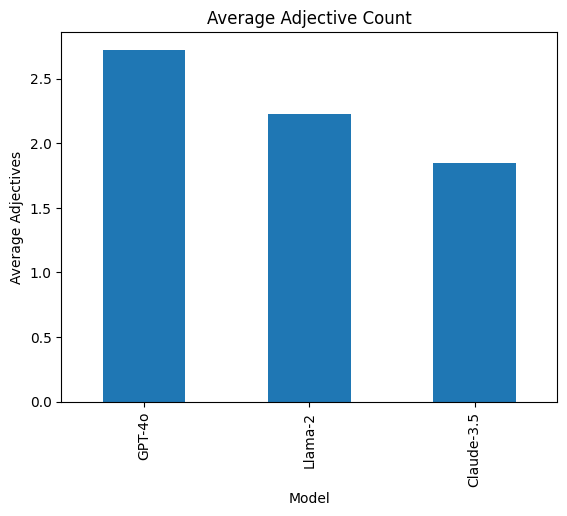

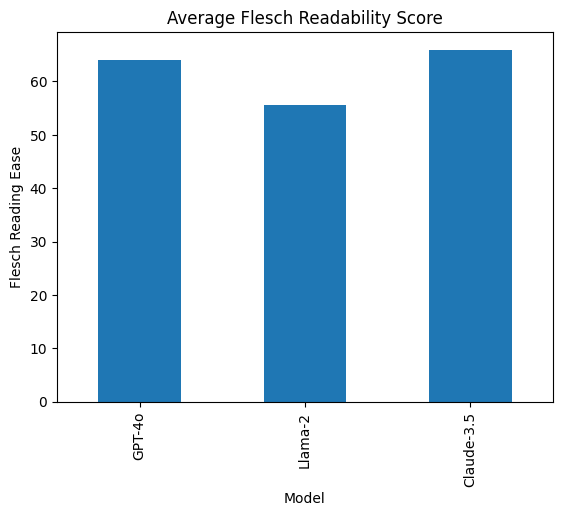

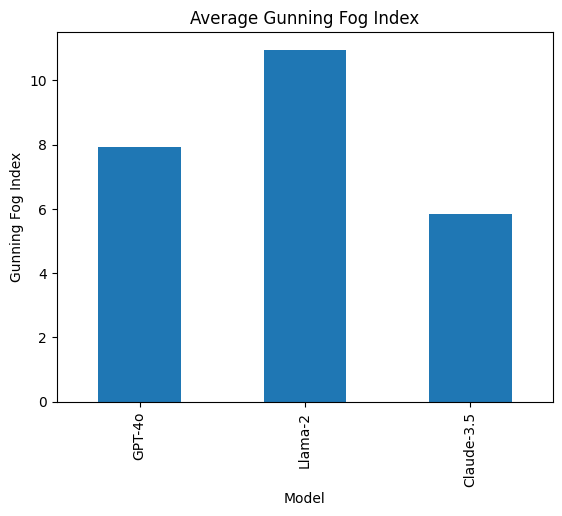

In [15]:
# Step 5: Visualizations
# Bar plot for average adjective count
summary[['Model', 'Avg_Adj_Count']].set_index('Model').plot(kind='bar', legend=False, title="Average Adjective Count")
plt.ylabel("Average Adjectives")
plt.show()

# Bar plot for readability (Flesch)
summary[['Model', 'Avg_Flesch_Score']].set_index('Model').plot(kind='bar', legend=False, title="Average Flesch Readability Score")
plt.ylabel("Flesch Reading Ease")
plt.show()

# Bar plot for readability (Gunning Fog)
summary[['Model', 'Avg_Gunning_Fog']].set_index('Model').plot(kind='bar', legend=False, title="Average Gunning Fog Index")
plt.ylabel("Gunning Fog Index")
plt.show()

In [16]:
# Step 6: Statistical Analysis
# ANOVA for adjective counts
anova_adj = f_oneway(
    data['GPT_adj_count'],
    data['LLaMA_adj_count'],
    data['Claude_adj_count']
)
print(f"ANOVA (Adjectives): p-value = {anova_adj.pvalue}")

# ANOVA for Flesch Readability
anova_flesch = f_oneway(
    data['GPT_readability_flesch'],
    data['LLaMA_readability_flesch'],
    data['Claude_readability_flesch']
)
print(f"ANOVA (Flesch Readability): p-value = {anova_flesch.pvalue}")

# ANOVA for Gunning Fog
anova_gunning = f_oneway(
    data['GPT_readability_gunning'],
    data['LLaMA_readability_gunning'],
    data['Claude_readability_gunning']
)
print(f"ANOVA (Gunning Fog): p-value = {anova_gunning.pvalue}")

ANOVA (Adjectives): p-value = 0.0015653292658314112
ANOVA (Flesch Readability): p-value = 0.006812103045307702
ANOVA (Gunning Fog): p-value = 1.1170120477031027e-09
